<h1 style="text-align: center;"><br>Image Classification with CNN<br><h1>


# Task and Dataset Info



**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [29]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [30]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [31]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [32]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [33]:
X_train[0].shape

(28, 28)

In [35]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

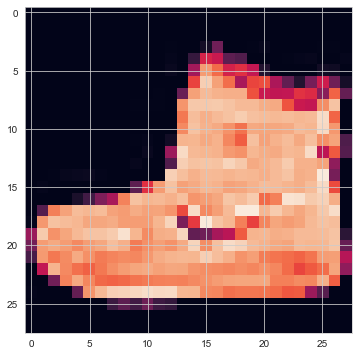

In [36]:
plt.imshow(X_train[0])

In [38]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [39]:
y_train.shape

(60000,)

In [40]:
y_train[0]

9

In [41]:
classes[9]

'Ankle boot'

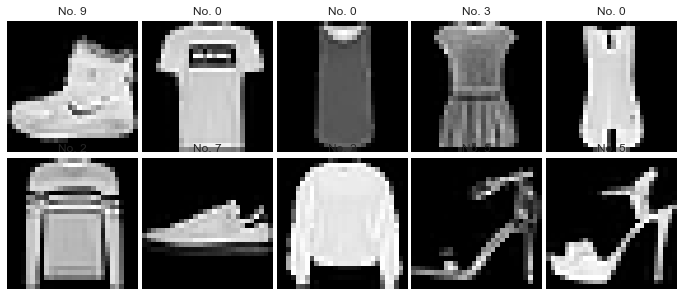

In [42]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        
plt.tight_layout()
plt.show()
plt.close()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [43]:
X_train.min()

0

In [44]:
X_train.max()

255

In [45]:
X_train = X_train/255
X_test = X_test/255

In [46]:
X_train.min()

0.0

In [47]:
X_train.max()

1.0

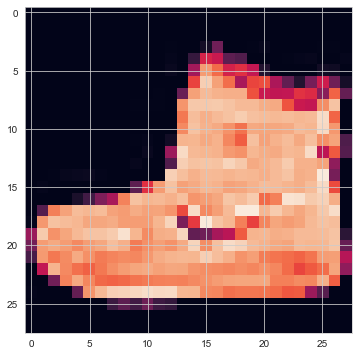

In [48]:
plt.imshow(X_train[0])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel.**

In [49]:
X_train.shape

(60000, 28, 28)

In [50]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [51]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [52]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [53]:
from tensorflow.keras.utils import to_categorical

In [54]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [55]:
y_train.shape

(60000,)

In [56]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [58]:
y_train[8]

5

In [61]:
Y_train[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [62]:
Y_test.shape

(10000, 10)

# Modeling

## Create The Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (3,3) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [64]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 256)               1211648   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                        

In [66]:
((3* 3 * 1) + 1) * 28

280

## Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [67]:
from tensorflow.keras.callbacks import EarlyStopping

In [68]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)

In [69]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 69s 35ms/step - loss: 0.4202 - accuracy: 0.8521 - val_loss: 0.3116 - val_accuracy: 0.8877
Epoch 2/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.3019 - accuracy: 0.8960 - val_loss: 0.3052 - val_accuracy: 0.8936
Epoch 3/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2826 - accuracy: 0.9032 - val_loss: 0.2880 - val_accuracy: 0.9018
Epoch 4/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.2763 - accuracy: 0.9046 - val_loss: 0.3050 - val_accuracy: 0.8926
Epoch 5/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2710 - accuracy: 0.9076 - val_loss: 0.3048 - val_accuracy: 0.8950
Epoch 6/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2734 - accuracy: 0.9061 - val_loss: 0.3062 - val_accuracy: 0.8974


**TASK 7: Plot values of metrics you used in your model.**

In [70]:
model.metrics_names

['loss', 'accuracy']

In [71]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.420,0.852,0.312,0.888
1,0.302,0.896,0.305,0.894
2,0.283,0.903,0.288,0.902
3,0.276,0.905,0.305,0.893
4,0.271,0.908,0.305,0.895


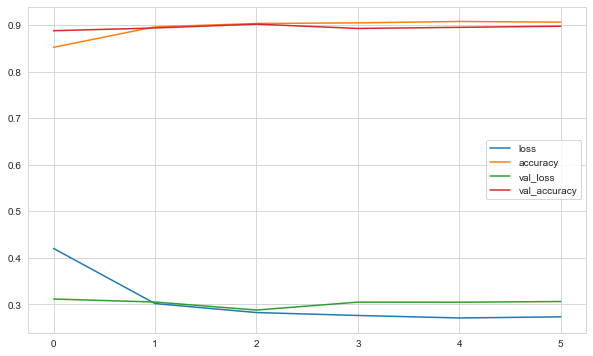

In [72]:
summary.plot();

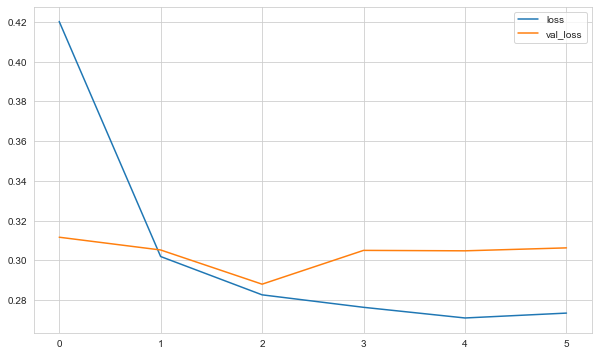

In [73]:
summary[["loss", "val_loss"]].plot();

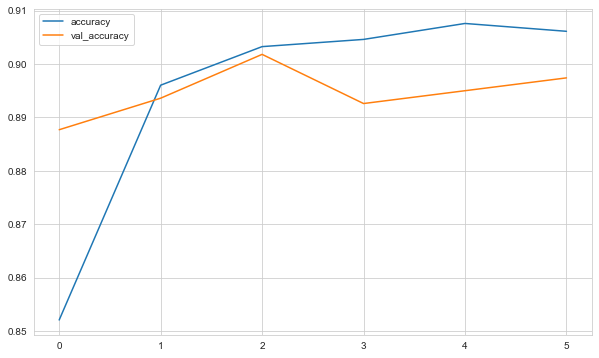

In [74]:
summary[["accuracy", "val_accuracy"]].plot();

In [75]:
model2 = Sequential()
model2.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))
model2.add(MaxPool2D(pool_size=(3, 3),strides=(1, 1)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [76]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 28)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 16128)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               2064512   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

In [77]:
model2.fit(X_train, Y_train, batch_size=32, epochs=15, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/15
1875/1875 [==============================] - 115s 60ms/step - loss: 0.4481 - accuracy: 0.8456 - val_loss: 0.3537 - val_accuracy: 0.8777
Epoch 2/15
1875/1875 [==============================] - 113s 60ms/step - loss: 0.3277 - accuracy: 0.8881 - val_loss: 0.3534 - val_accuracy: 0.8788
Epoch 3/15
1875/1875 [==============================] - 118s 63ms/step - loss: 0.3155 - accuracy: 0.8926 - val_loss: 0.3052 - val_accuracy: 0.8920
Epoch 4/15
1875/1875 [==============================] - 120s 64ms/step - loss: 0.3127 - accuracy: 0.8925 - val_loss: 0.3401 - val_accuracy: 0.8830
Epoch 5/15
1875/1875 [==============================] - 112s 60ms/step - loss: 0.3110 - accuracy: 0.8947 - val_loss: 0.3295 - val_accuracy: 0.8880
Epoch 6/15
1875/1875 [==============================] - 106s 56ms/step - loss: 0.3120 - accuracy: 0.8929 - val_loss: 0.3112 - val_accuracy: 0.8905


In [78]:
summary = pd.DataFrame(model2.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.448,0.846,0.354,0.878
1,0.328,0.888,0.353,0.879
2,0.315,0.893,0.305,0.892
3,0.313,0.893,0.340,0.883
4,0.311,0.895,0.329,0.888


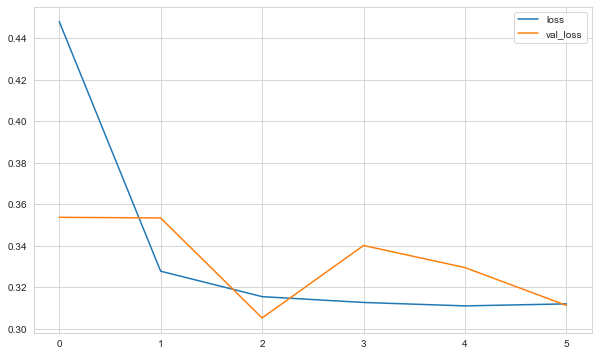

In [79]:
summary[["loss", "val_loss"]].plot();

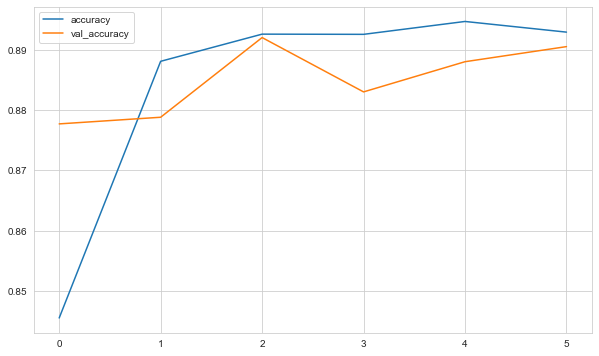

In [80]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this.**

In [81]:
from sklearn.metrics import classification_report, confusion_matrix

In [82]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.2880 - accuracy: 0.9018


[0.28796955943107605, 0.9017999768257141]

In [83]:
model2.evaluate(X_test, Y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.3052 - accuracy: 0.8920


[0.3051999807357788, 0.8920000195503235]

In [84]:
score = model2.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3051999807357788
Test accuracy: 0.8920000195503235


In [85]:
pred_prob = model2.predict(X_test)
pred_prob

313/313 [==============================] - 4s 12ms/step


array([[7.21435299e-07, 1.77345907e-08, 2.17688239e-06, ...,
        4.13205707e-03, 1.44327805e-05, 9.94078994e-01],
       [8.51302866e-06, 1.07811255e-13, 9.99984980e-01, ...,
        6.07028491e-16, 9.07735068e-11, 4.77140774e-15],
       [8.95486608e-07, 9.99997139e-01, 1.47238497e-08, ...,
        2.64668443e-11, 7.63288767e-07, 5.44427177e-11],
       ...,
       [6.32857791e-07, 8.12973907e-12, 6.40514060e-08, ...,
        1.41120724e-08, 9.99997735e-01, 6.67418787e-09],
       [6.47361912e-06, 9.99185503e-01, 6.00345118e-07, ...,
        1.60693669e-09, 1.46381456e-06, 2.15876099e-08],
       [1.55029716e-02, 6.79987541e-04, 2.39757374e-02, ...,
        3.66133422e-01, 3.77425440e-02, 2.06783786e-01]], dtype=float32)

In [86]:
pred_prob.shape

(10000, 10)

In [87]:
pred_prob[0]

array([7.21435299e-07, 1.77345907e-08, 2.17688239e-06, 3.50050442e-07,
       3.09357688e-07, 1.76987913e-03, 1.09896587e-06, 4.13205707e-03,
       1.44327805e-05, 9.94078994e-01], dtype=float32)

In [88]:
np.argmax(pred_prob[0])

9

In [89]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 7], dtype=int64)

In [90]:
y_pred.shape

(10000,)

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       1.00      0.96      0.98      1000
           2       0.83      0.82      0.83      1000
           3       0.85      0.93      0.89      1000
           4       0.80      0.84      0.82      1000
           5       0.98      0.97      0.97      1000
           6       0.73      0.66      0.69      1000
           7       0.94      0.96      0.95      1000
           8       0.99      0.97      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [92]:
print(confusion_matrix(y_test, y_pred))

[[858   0  13  34   8   2  80   0   5   0]
 [  0 956   3  32   3   0   5   0   1   0]
 [ 13   0 819  10  87   0  71   0   0   0]
 [ 12   3  12 925  18   0  30   0   0   0]
 [  1   0  63  39 845   0  52   0   0   0]
 [  0   0   0   1   0 972   0  18   0   9]
 [136   0  68  37  93   0 660   0   6   0]
 [  0   0   0   0   0  15   0 962   0  23]
 [  2   1   4   5   7   2   5   4 970   0]
 [  0   0   0   0   0   4   1  41   1 953]]


In [93]:
(y_test != y_pred).sum()

1080

## Prediction

In [94]:
samples=[X_test[5], X_test[10], X_test[15]]

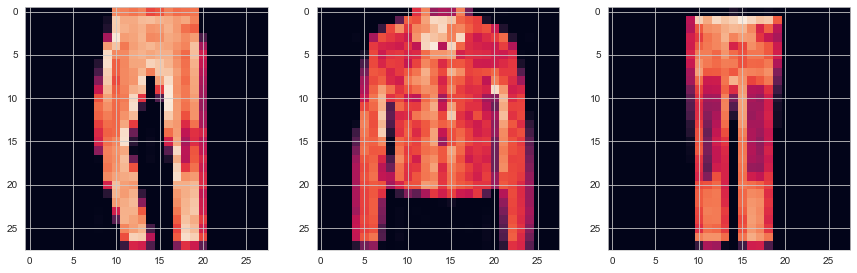

In [95]:
plt.figure(figsize = (20,5))
index=1
for i in samples:
    plt.subplot(1,4,index)
    plt.imshow(i.reshape(28,28))
    index += 1

In [96]:
samples = np.array(samples)
samples

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [97]:
samples.shape

(3, 28, 28, 1)

In [98]:
pred_prob = model2.predict(samples)
pred_prob

1/1 [==============================] - 0s 48ms/step


array([[4.3965842e-06, 9.9998462e-01, 3.8795409e-07, 2.1872497e-06,
        6.1885731e-07, 1.1202184e-07, 5.3816598e-07, 2.6925551e-10,
        7.1831123e-06, 5.7738569e-10],
       [7.4488460e-04, 1.1715037e-04, 1.0604139e-01, 3.5211924e-04,
        8.0062449e-01, 9.5172154e-06, 9.1935568e-02, 2.9443129e-07,
        1.7340075e-04, 1.1142240e-06],
       [2.7918257e-04, 9.8773301e-01, 2.3657327e-05, 9.8771220e-03,
        1.7008220e-03, 3.9774875e-07, 3.6860886e-04, 1.8476205e-08,
        1.7239801e-05, 9.8918683e-08]], dtype=float32)

In [99]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([1, 4, 1], dtype=int64)

In [100]:
y_test[5:16:5]

array([1, 4, 1], dtype=uint8)

In [101]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [102]:
for i in y_test[5:16:5]:
    print(classes[i])

Trouser
Coat
Trouser
